<a href="https://colab.research.google.com/github/shatakshii25/Machine-Learning-Projects/blob/main/MultiLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import seaborn as sns

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [12]:
df = pd.read_csv('/content/adult.csv')

In [13]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
l = LabelEncoder() 

In [15]:
columns = ["col1", "col2","col4","col6","col7","col8","col9","col10","col14","col15"]
for i in columns:
  df[i] = l.fit_transform(df[i].astype(str))
  label_to_id_dict = {v:i for i,v in enumerate(np.unique(df[i]))}
  df[i] = [label_to_id_dict[x] for x in df[i]]

In [16]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,22,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,33,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,21,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,36,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,11,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


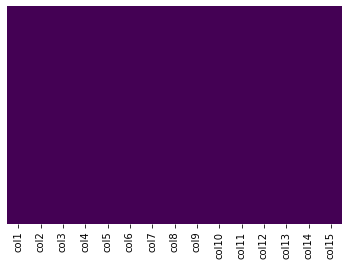

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
df1 = df.dropna()

In [19]:
df1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15
0,22,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,33,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,21,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,36,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,11,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [20]:
x = df1.drop('col15',axis=1)
y = df1['col15']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [22]:
model = MLPClassifier(max_iter=500, activation='relu')

In [23]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [24]:
grid = dict()

In [25]:
grid['max_iter'] = [1,10,100,1000,10000]
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [26]:
results = search.fit(x_train, y_train)

In [28]:
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.745
Config: {'max_iter': 10000}


In [29]:
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.619 with: {'max_iter': 1}
>0.656 with: {'max_iter': 10}
>0.717 with: {'max_iter': 100}
>0.666 with: {'max_iter': 1000}
>0.745 with: {'max_iter': 10000}


In [31]:
predictions=search.predict(x_test)

In [32]:
accuracy_score(y_test, predictions)

0.7309857713174327